# Imports

In [23]:
# For data analysis and data structures in DataFrames
import pandas as pd
# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import json as JSON
import collections 


# Setup dataframe

In [24]:
# Load dataset
df = pd.read_csv('media_bias.csv')

number_of_data_points_with_biased_words = 0
number_of_biased_words = 0
# Plot the distribution of the amount of biased_words in the dataset
#for biased_words in df['biased_words4']:
df['biased_words'] = ''
for i in range(0, len(df['biased_words4'])):
    # Remove characters from the string
    # so that it can be converted from a string
    # to an array of strings
    df['biased_words'][i] = np.array(df['biased_words4'][i].replace('[', '').replace(']', '').replace("'", '').split(', '))
    # print(df['biased_words'][i])

df.drop(columns=['biased_words4'], inplace=True)

/tmp/ipykernel_11739/1990659903.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['biased_words'][i] = np.array(df['biased_words4'][i].replace('[', '').replace(']', '').replace("'", '').split(', '))


# Feature visualization and analysis

<AxesSubplot: >

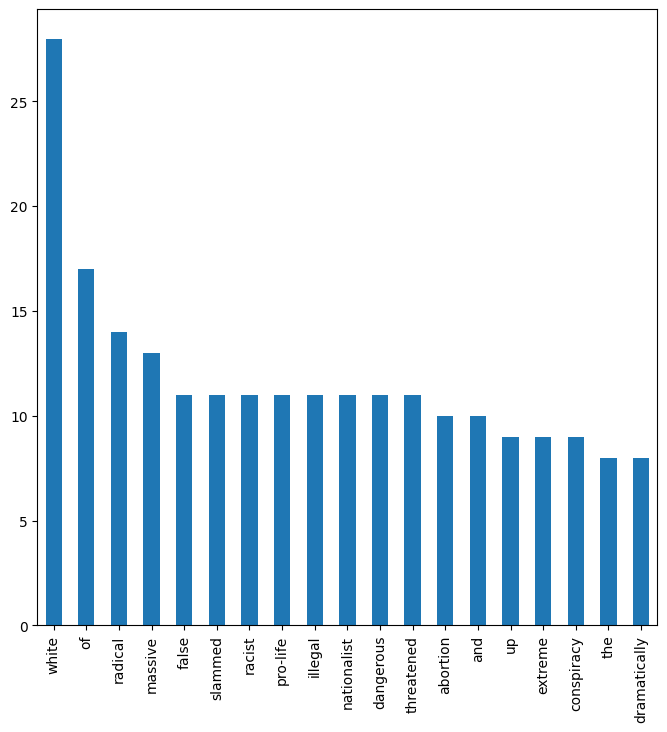

In [25]:
# Find unique values and display the largest 20 in a 
df['biased_words'].explode().value_counts()[1:20].plot.bar(figsize=(8,8))

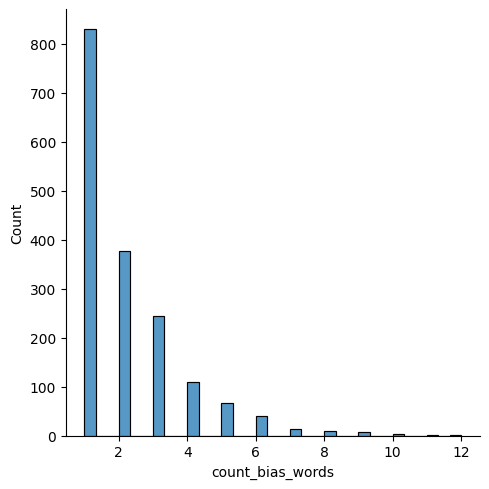

<bound method NDFrame.head of 0       2
1       1
2       1
3       1
4       5
       ..
1695    4
1696    2
1697    1
1698    1
1699    1
Name: count_bias_words, Length: 1700, dtype: int64>

In [26]:
#print(len(df['biased_words4'][0:]))
df['count_bias_words'] = df['biased_words'].map(len)
# df['count_bias_words'].plot(kind='kde')
# plt.show()
sns.displot(df['count_bias_words'])
plt.show()

df['count_bias_words'].head

## Correlation checks

### Topic and label_bias

In [27]:
# Correlation between bias label and Topic feature in general

# Make a copy of the data frame so that columns are not overwritten with
# numeric values.
dfCopy = df.copy()

dfCopy['topic'] = dfCopy['topic'].astype('category').cat.codes
dfCopy['Label_bias'] = dfCopy['Label_bias'].astype('category').cat.codes
dfCopy.corr()['Label_bias']['topic']


/tmp/ipykernel_11739/1125092929.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCopy.corr()['Label_bias']['topic']


-0.03312874060844754

In [28]:
# Correlation between bias label and each topic value
s_corr = df.topic.str.get_dummies().corrwith(df['Label_bias'].astype('category').cat.codes)
print(s_corr)


abortion                                -0.051860
coronavirus                              0.002015
elections-2020                          -0.024377
environment                              0.017935
gender                                   0.055068
gun-control                              0.005897
immigration                              0.029517
international-politics-and-world-news    0.026522
middle-class                            -0.013546
sport                                    0.145206
student-debt                             0.005479
trump-presidency                        -0.085066
vaccines                                -0.015487
white-nationalism                       -0.095884
dtype: float64


### outlet and label_bias

In [29]:
# Correlation between bias label and outlet feature in general

# Make a copy of the data frame so that columns are not overwritten with
# numeric values.
dfCopy = df.copy()

dfCopy['outlet'] = dfCopy['outlet'].astype('category').cat.codes
dfCopy['Label_bias'] = dfCopy['Label_bias'].astype('category').cat.codes
dfCopy.corr()['Label_bias']['outlet']

/tmp/ipykernel_11739/2303357295.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCopy.corr()['Label_bias']['outlet']


0.3406574522875378

In [30]:
# Correlation between bias label and each outlet value
s_corr = df.outlet.str.get_dummies().corrwith(df['Label_bias'].astype('category').cat.codes)
print(s_corr)

alternet     -0.214343
breitbart    -0.014670
federalist   -0.199169
fox-news      0.069658
huffpost     -0.057987
msnbc         0.066561
reuters       0.246866
usa-today     0.202358
dtype: float64


### type and label_bias

In [31]:
# Correlation between bias label and type feature in general

# Make a copy of the data frame so that columns are not overwritten with
# numeric values.
dfCopy = df.copy()

dfCopy['type'] = dfCopy['type'].astype('category').cat.codes
dfCopy['Label_bias'] = dfCopy['Label_bias'].astype('category').cat.codes
dfCopy.corr()['Label_bias']['type']

/tmp/ipykernel_11739/666644678.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCopy.corr()['Label_bias']['type']


-0.24937625866900645

In [32]:
# Correlation between bias label and each type value
s_corr = df.type.str.get_dummies().corrwith(df['Label_bias'].astype('category').cat.codes)
print(s_corr)

center    0.335271
left     -0.156243
right    -0.108863
dtype: float64


### Unique data points for outlets, topics, type    

Outlet data points
Amount of unique outlets: 8


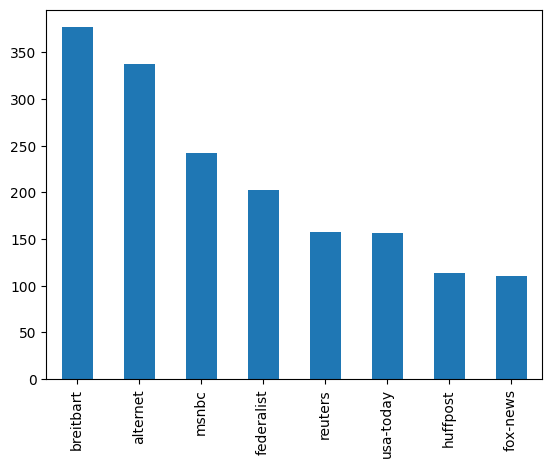

Topic data points
Amount of unique topics: 14


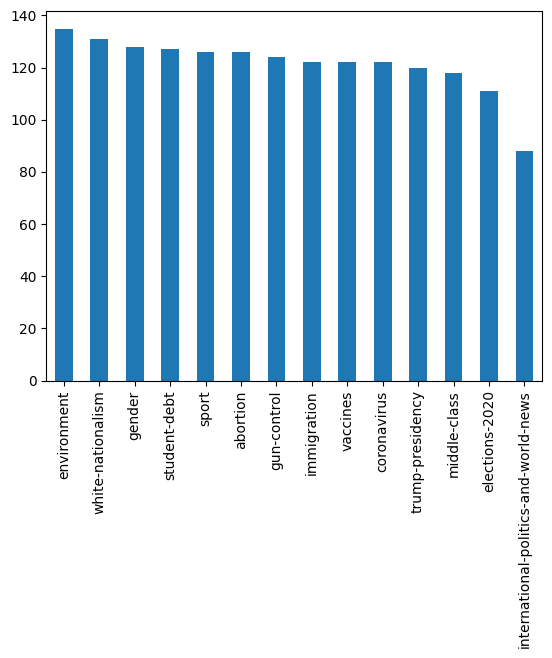

Type data points
Amount of unique types: 3


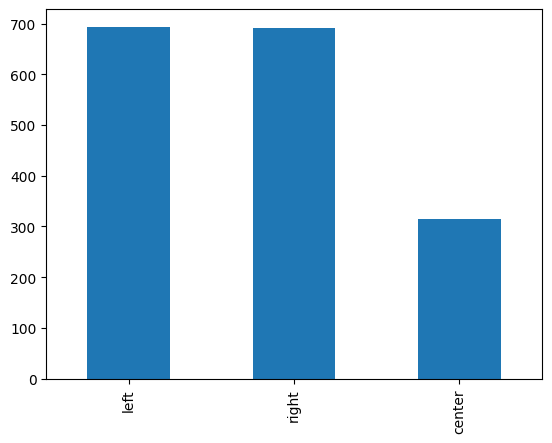

In [33]:
print("Outlet data points")
df['outlet'].value_counts()
outlet = df['outlet'].value_counts()
print("Amount of unique outlets:", len(outlet))
outlet.plot.bar()
plt.show()
print("Topic data points")
topics = df['topic'].value_counts()
print("Amount of unique topics:", len(topics))
topics.plot.bar()
plt.show()
print("Type data points")
type = df['type'].value_counts()
print("Amount of unique types:", len(type))
type.plot.bar()
plt.show()

Label data points
Entirely factual                         572
Expresses writer’s opinion               521
Somewhat factual but also opinionated    433
No agreement                             174
Name: Label_opinion, dtype: int64


<AxesSubplot: >

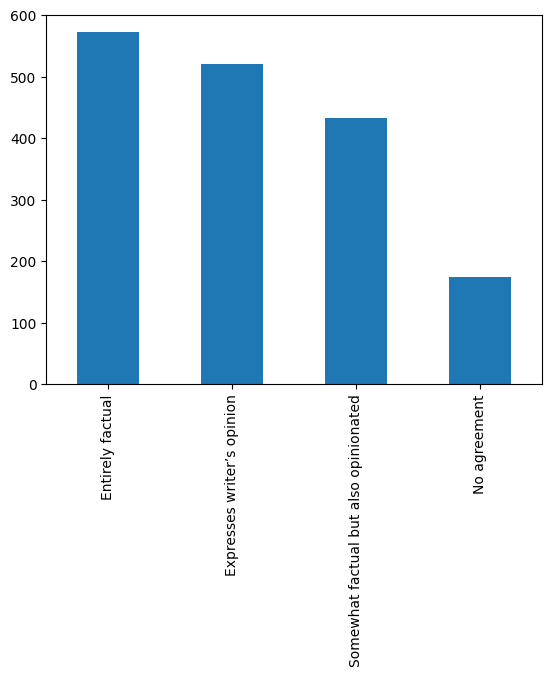

In [34]:
print("Label data points")
labels = df['Label_opinion'].value_counts()
print(labels)
labels.plot.bar()

# Data cleaning

### Check for Undecided bias results

In [40]:
# Check for rows with undecided as the bias result

# Check for all the types of possible results we can get
print(df['Label_bias'].unique())

# Check the number of times that 'No agreement' occurs.

# Extract the rows with a label of No agreement
no_agreement_rows = df[df['Label_bias'] == 'No agreement']

# Visualize the data with a 'No agreement' label
no_agreement_rows

# print the number of rows with a 'No agreement' label
print(len(no_agreement_rows))

# Remove rows with a 'No agreement' label.
df = df[df.Label_bias != 'No agreement']

# Verify that 'No agreement' no longer exists inside the data frame.
print(df['Label_bias'].unique())





['Biased' 'Non-biased' 'No agreement']
149
['Biased' 'Non-biased']


### Check for duplicates

In [41]:
# Check for duplicate rows
df[df.astype(str).duplicated()]

,sentence,outlet,type,Label_bias,Label_opinion,biased_words


### Remove unwanted data

In [42]:
# view the existing columns
df.info()
# Define the columns to drop
columns_to_drop = ['group_id', 'num_sent', 'Unnamed: 0', 'count_bias_words', 'news_link', 'topic', 'article']
# Drop the columns that are irrelevant
df = df.drop(columns_to_drop, axis=1)
# view the columns that exist to verify the column drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1551 entries, 0 to 1699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentence       1551 non-null   object
 1   outlet         1551 non-null   object
 2   type           1551 non-null   object
 3   Label_bias     1551 non-null   object
 4   Label_opinion  1551 non-null   object
 5   biased_words   1551 non-null   object
dtypes: object(6)
memory usage: 84.8+ KB


KeyError: "['group_id', 'num_sent', 'Unnamed: 0', 'count_bias_words', 'news_link', 'topic', 'article'] not found in axis"

### Check for missing values

In [43]:
def checkMissingValues(df):
    # Check for missing data
    # Count the number of missing values for each feature.
    missing_count = df.isna().sum().sort_values(ascending = False)
    # Make an array that contains only features with 
    # missing values and their count
    missing_count = missing_count[missing_count != ""]
    return missing_count

print(checkMissingValues(df))
# Drop rows that contain null values
df = df.dropna()

# Confirm if there are null values
print('---------------') # Separator for previous and next output
print(checkMissingValues(df))

sentence         0
outlet           0
type             0
Label_bias       0
Label_opinion    0
biased_words     0
dtype: int64
---------------
sentence         0
outlet           0
type             0
Label_bias       0
Label_opinion    0
biased_words     0
dtype: int64


In [44]:
df

,sentence,outlet,type,Label_bias,Label_opinion,biased_words
0,YouTube is making clear there will be no “birt...,usa-today,center,Biased,Somewhat factual but also opinionated,"[belated, birtherism]"
1,The increasingly bitter dispute between Americ...,msnbc,left,Non-biased,Entirely factual,[bitter]
2,So while there may be a humanitarian crisis dr...,alternet,left,Biased,Expresses writer’s opinion,[crisis]
3,A professor who teaches climate change classes...,breitbart,right,Non-biased,No agreement,[legitimate]
4,"Looking around the United States, there is nev...",federalist,right,Biased,Somewhat factual but also opinionated,"[killing, never, developing, humans, enough]"
...,...,...,...,...,...,...
1695,In every case legislators are being swarmed by...,alternet,left,Biased,Expresses writer’s opinion,"[deceit, hysteria, swarmed, right-wing]"
1696,Polls show the transgender ideology is deeply ...,breitbart,right,Biased,Somewhat factual but also opinionated,"[ideology, unpopular]"
1697,Democrats and Republicans stood and applauded ...,usa-today,center,Non-biased,Entirely factual,[saluted]
1698,"As a self-described Democratic socialist, Sen....",fox-news,right,Non-biased,Entirely factual,[outspoken]


# Create CSV from cleaned data frame

In [47]:
# Define the location to save the cleaned csv to.
directory_to_save = "../../news_bias_evaluator/server/media_bias_dataset_cleaned.csv"
# Save the csv
df.to_csv(directory_to_save)

NameError: name 'directory_to_savew' is not defined